In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = data[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']]
y = data.Outcome

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 90)

In [15]:
dmodel = DecisionTreeClassifier(max_depth = 7)
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7)

In [21]:
yprediction = dmodel.predict(xtest)

In [22]:
#Model Evalution
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy={accuracy:.2%}')

Accuracy=70.78%


In [23]:
#Glucose = 200
#blood pressure = 140
#DPF = 0.9
#Age = 40
#order same nai huna parxa
dmodel.predict([[200,140,0.9,40]])

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Saving and Loading Models with joblib

In [27]:
#to save this model
import joblib
import pickle

## Pickle

In [ ]:
#How pickle works??

You have an object (e.g., a trained scikit-learn model).
You use pickle.dump() to write that object to a file in a serialized form.
The file now contains all the information to recreate that object.
Later, you use pickle.load() to read the file and get back the original object.

In [ ]:
to save joblib.dump()
to load joblib.load()
#yini haru ma modeol save garxam so that arko choti model chahiyo baney direct yo use garne mathi ko kaam garirahana parena

In [26]:
joblib.dump(dmodel,'DecisionTreePrediction.pkl') # to file save hunxa folder ma 


['DecisionTreePrediction.pkl']

In [30]:
#load the model
model_d = joblib.load('DecisionTreePrediction.pkl')

In [31]:
model_d

DecisionTreeClassifier(max_depth=7)

In [ ]:
#yeslai directly use garna sakinxa

In [32]:
model_d.predict([[220,16,1.5,40]])

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#DecisionTreeRegresssion yo chai regression ma use garna sakinxa

###  Random Forest

In [ ]:
#RandomForestClassifier

In [ ]:
Ensemble learning: Random forest lies in this method,combines the result of multiple learner
RandomForest: derai ota decision tree banauxa  ra uniharu ko result lai combine garxa
-builds multiple decision tree

In [ ]:
Glucose, BloodPressure, DPF, Age yetimai derai ota decision tree banauxa 

In [ ]:
Random Forest: 
Decision Tree1 banda glucose, bloodpressure... dpf, age ko 
n rows ie training ma 200 ota rows thyo re ra agadi ko 200 rows bata Random sampling garxa

In [33]:
import pandas as pd

In [34]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = data[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']]
X.head(10)

,Glucose,BloodPressure,DiabetesPedigreeFunction,Age
0,148,72,0.627,50
1,85,66,0.351,31
2,183,64,0.672,32
3,89,66,0.167,21
4,137,40,2.288,33
5,116,74,0.201,30
6,78,50,0.248,26
7,115,0,0.134,29
8,197,70,0.158,53
9,125,96,0.232,54


In [ ]:
# random forest le banaune first decison tree le yo sabai row lidaina yesle 10 ota bata random samplig garera 10 ota select garxa
randomly pick garxa ie kunai row haru multiple time select huna sakxa ra kunai rows select nai nahuna sakxa
ra arko decision tree banda pheri random sampling garxa 10 ota bata i yesari different different data janxa tree ma  called Boot Strap samples ra xutta xutai treee banxa kinaki
farak farak rows haru ako xa tara original size  ta teti nai rahanxa

In [ ]:
##Boot Strap samples
jastai 10ota data xa bhane ra 4 ota feature or component xa bhane pratek choti decision tree banauda random sample ie 4 ota row ko farak 
data or 3 ota row ko autai data derai choti gayera 10 bandina sakxa , kaile 1 row ko nai 6 ota data gayera aru bata 6 ota gayera 10 ota banadina
sakxa so yesari different decicison treee banxa ra yesko rsult lai combine garera voting garera predict garxa
natra random sampling gariyena vaney pratek choti tei same order ma data janxa ra tero decison tree ma same data gayo bhaney same decsion tree banxa ra op
pani farak hudaina so faida nai vayena teti derai decision tree banayera tesko op combine garna lai

In [38]:
y = data.Outcome

In [ ]:
data split huda mathi select gareko 4 ota component sabai nalina sakxa 3 ota matra component  use garna sakxa ra tesari descison tree farak farak banna sakxa
yesma repaet hudaina tara liney bela farak farak chai linxa

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [45]:
rf_model = RandomForestClassifier(n_estimators=200) # n_estimators dina ni milxa ie no of decision tree 200 ota bana vanera diney
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [43]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
yprediction = rf_model.predict(xtest)


In [47]:
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy={accuracy:.2%}')

Accuracy=75.32%


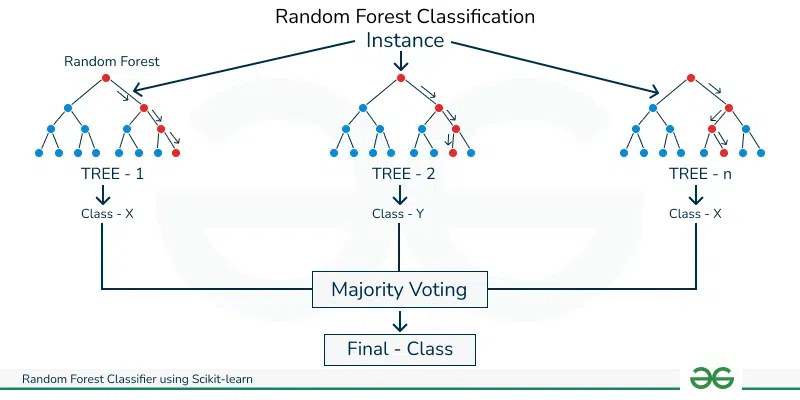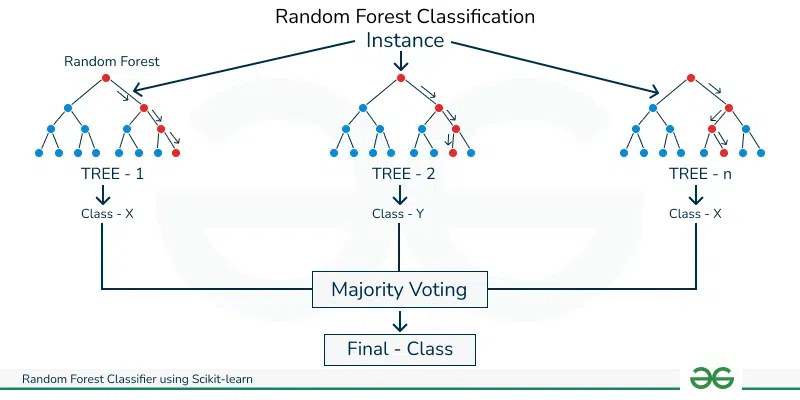